In [1]:
# this notebook is for investigating the value function

import torch as th
import gymnasium as gym
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sys.path.append('../src/')
from az.model import AlphaZeroModel
from environments.environment import investigate_model, plot_policy_network, plot_value_network

In [2]:


env_id = "CliffWalking-v0"
checkpoint_path = f"../runs/{env_id}*"
env = gym.make(env_id, render_mode="rgb_array")

if "*" in checkpoint_path:
    matches = glob.glob(checkpoint_path)
    dir = max(matches)
    checkpoint_path = os.path.join(dir, "checkpoint.pth")
checkpoint_path

ValueError: max() arg is an empty sequence

In [ ]:

model = AlphaZeroModel.load_model(checkpoint_path, env)
model

AlphaZeroModel(
  (layers): ModuleList(
    (0): Linear(in_features=48, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=256, bias=True)
    (6): ReLU()
    (7): Linear(in_features=256, out_features=256, bias=True)
    (8): ReLU()
    (9): Linear(in_features=256, out_features=256, bias=True)
    (10): ReLU()
  )
  (value_head): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
  (policy_head): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=4, bias=True)
  )
)

In [ ]:
assert isinstance(env.observation_space, gym.spaces.Discrete)
outputs = investigate_model(env.observation_space, model)
outputs

{0: (tensor(-619.7493), tensor([0.3423, 0.2049, 0.1873, 0.2655])),
 1: (tensor(-614.3286), tensor([0.3414, 0.2052, 0.1878, 0.2657])),
 2: (tensor(-595.5913), tensor([0.3383, 0.2065, 0.1894, 0.2658])),
 3: (tensor(-577.7758), tensor([0.3357, 0.2075, 0.1910, 0.2658])),
 4: (tensor(-556.8755), tensor([0.3325, 0.2087, 0.1929, 0.2659])),
 5: (tensor(-539.7377), tensor([0.3299, 0.2098, 0.1945, 0.2659])),
 6: (tensor(-523.4750), tensor([0.3275, 0.2107, 0.1959, 0.2659])),
 7: (tensor(-505.1219), tensor([0.3247, 0.2118, 0.1975, 0.2659])),
 8: (tensor(-478.5779), tensor([0.3209, 0.2133, 0.1999, 0.2658])),
 9: (tensor(-452.4212), tensor([0.3173, 0.2146, 0.2022, 0.2659])),
 10: (tensor(-418.3242), tensor([0.3121, 0.2168, 0.2055, 0.2657])),
 11: (tensor(-394.3442), tensor([0.3086, 0.2181, 0.2077, 0.2656])),
 12: (tensor(-619.8929), tensor([0.3421, 0.2050, 0.1872, 0.2657])),
 13: (tensor(-612.9890), tensor([0.3412, 0.2053, 0.1879, 0.2656])),
 14: (tensor(-595.2908), tensor([0.3385, 0.2063, 0.1895, 0

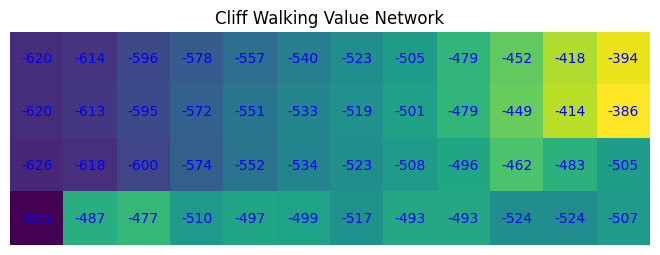

In [ ]:
from torchvision.transforms import ToTensor
from PIL import Image
import io
def plot_to_tensor(fig):
    """Convert a Matplotlib figure to a 4D tensor for TensorBoard."""
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    tensor = ToTensor()(img).unsqueeze(0)
    return tensor

plot_value_network(outputs)
